<a href="https://colab.research.google.com/github/kellyf02/Class-2-Ferris/blob/main/FinalExam_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import all the necessary packages.  **[2 points]**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For oversampling using SMOTE
from imblearn.over_sampling import SMOTE

# For machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# For model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [3]:
from google.colab import files
import io
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card.csv']))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Rename the dependent variable:

In [5]:
#renaming the dependent variable
df['IsDefaulter'] =df['default.payment.next.month']
df = df.drop('default.payment.next.month',axis = 1)

#renaming a few other independent variables
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# **EXPLORATORY DATA ANALYSIS**  **[05 points]**

2. What is the size of the dataset? What do the columns tell you? That is, what are the features?

3. Print the summary statistics. On Brightspace, describe your findings (in around 4-5 lines). What trends do you notice? Any anomaly? Does anything stick out as being strange?

In [7]:
# Get the size of the dataset
dataset_size = df.shape
print(f"The dataset has {dataset_size[0]} rows and {dataset_size[1]} columns.")

# Get the features (column names)
features = df.columns.tolist()
print(f"The features of the dataset are: {features}")

The dataset has 30000 rows and 25 columns.
The features of the dataset are: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter']


In [8]:
# Print summary statistics
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE      PAY_SEPT       PAY_AUG       PAY_JUL       PAY_JUN  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

## 4. How would you deal with **missing values**? HINT: look at the education variable and what each category means in the definitions list that I have provided you with.

##### Explain what you do with missing values. Do you drop them, or ignore them, or impute them with the average, or put them into fewer buckets? Explain your reasoning. **Check** if **other variables** require the same treatment or not.  **[5 points]**

In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Consolidate 'EDUCATION' categories
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 'Other')

# Print the results
print(df['EDUCATION'].value_counts())

EDUCATION
2        14030
1        10585
3         4917
Other      345
4          123
Name: count, dtype: int64


### Similarly, check for **outliers** and deal with them accordingly.

In [56]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Select numerical features for outlier detection
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
                     'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
                     'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

# Function to detect and cap outliers using IQR method
def cap_outliers_iqr(data, feature):
  """Caps outliers using the Interquartile Range (IQR) method.

  Args:
    data: The DataFrame containing the data.
    feature: The name of the feature to cap outliers for.

  Returns:
    The DataFrame with capped outliers.
  """
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR
  data[feature] = np.clip(data[feature], lower_bound, upper_bound)
  return data

# Cap outliers for each numerical feature
for feature in numerical_features:
  df = cap_outliers_iqr(df, feature)

# You can now proceed with further analysis and modeling using the modified 'df'

### 5. What is the **probability of default**?  **[3 points]**

In [20]:
# Calculate the probability of default
probability_of_default = df['IsDefaulter'].mean()

# Print the probability
print(f"The probability of default is: {probability_of_default:.4f}")

The probability of default is: 0.2212


### 6. Create a few charts like count of default, and sex, education, marriage, and age versus default. These can be bar charts, pie charts, whatever you like. You can select other variables as per your liking too.  **[10 points]**

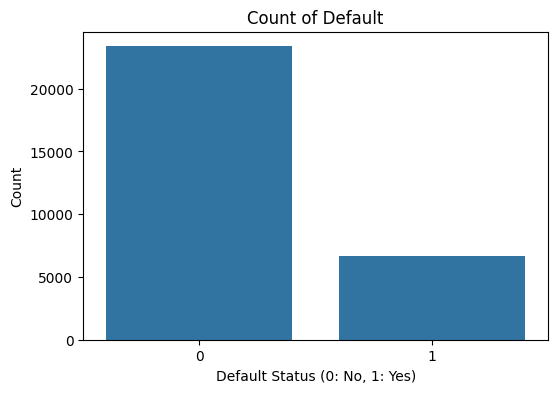

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='IsDefaulter', data=df)
plt.title('Count of Default')
plt.xlabel('Default Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

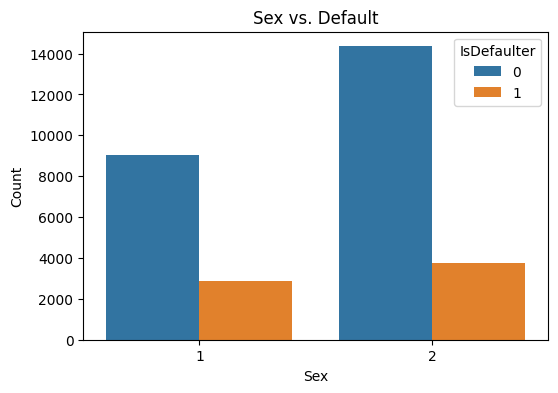

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', hue='IsDefaulter', data=df)
plt.title('Sex vs. Default')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

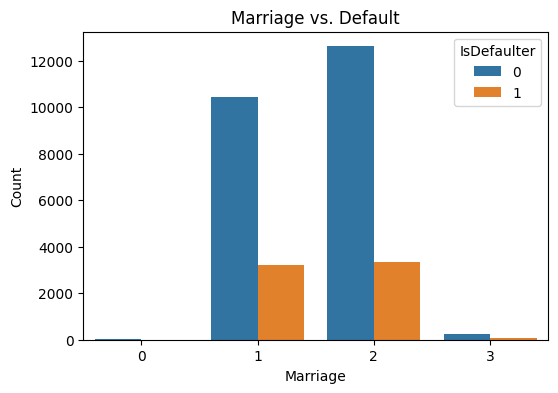

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='MARRIAGE', hue='IsDefaulter', data=df)
plt.title('Marriage vs. Default')
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.show()

## I am first goint to balance the imbalanced dataset. Next, I have created a column which is the sum of all payments made by each consumer.

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

columns = list(df.columns)
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['IsDefaulter'] = y_smote
df_fr = balance_df.copy()
df_fr['Payment_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

Original dataset shape 30000
Resampled dataset shape 46728


### 7. What is the payment value and dues value of a defaulter versus a non-defaulter, on average? Show me a boxplot and indicate if there is a difference.  **[4 points]**

             Payment_Value           Dues
IsDefaulter                              
0                -1.980140  170053.780207
1                 1.672916  166936.115516


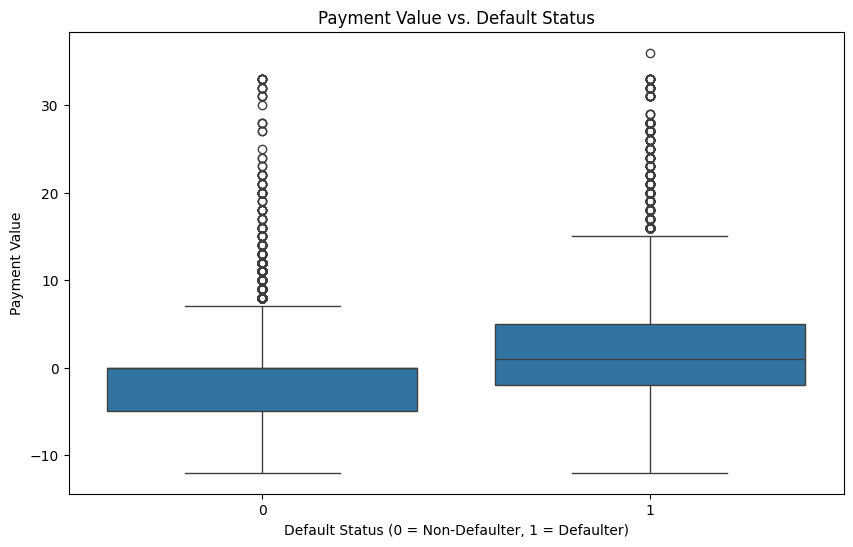

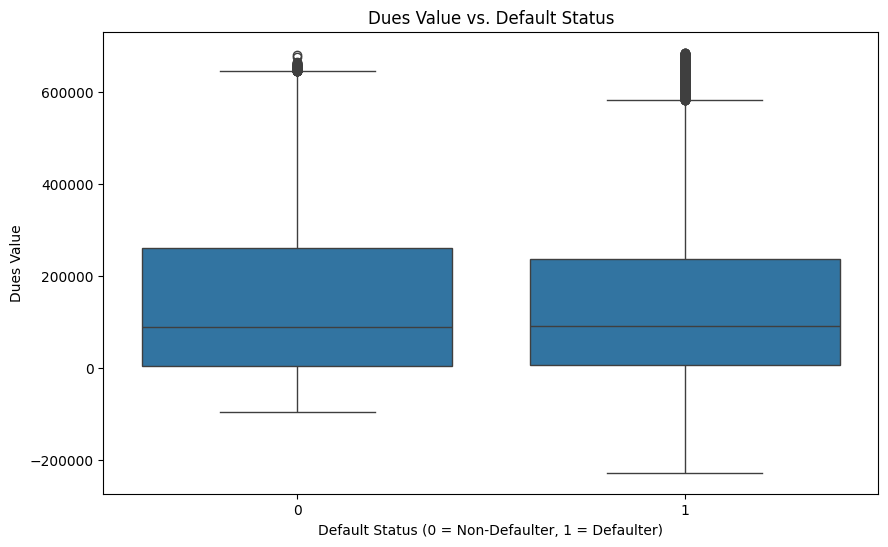

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_fr is your DataFrame with 'Payment_Value', 'Dues', and 'IsDefaulter' columns

# 1. Calculate Average Payment Value and Dues
avg_values = df_fr.groupby('IsDefaulter')[['Payment_Value', 'Dues']].mean()
print(avg_values)

# 2. Create Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsDefaulter', y='Payment_Value', data=df_fr)
plt.title('Payment Value vs. Default Status')
plt.xlabel('Default Status (0 = Non-Defaulter, 1 = Defaulter)')
plt.ylabel('Payment Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='IsDefaulter', y='Dues', data=df_fr)
plt.title('Dues Value vs. Default Status')
plt.xlabel('Default Status (0 = Non-Defaulter, 1 = Defaulter)')
plt.ylabel('Dues Value')
plt.show()

# 3. Analyze the Difference
# (Based on the boxplots and average values)
# ...

### 8. Convert your sex, education, and marriage columns to string variables, and then **'one-hot-encode'** them.  **[6 points]**

#### The process for 'sex' shown to you as an example:

In [37]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_fr = df_fr.replace(encoders_nums)
df_fr.head() # ideally, your table should look like this once you run your code up to this point.

<ipython-input-37-140025da5af5>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fr = df_fr.replace(encoders_nums)


,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_Other,Payment_Value,Dues
0,1,20000.0,0,Married,24.0,2,2,-1,-1,-2,...,0.0,0.0,1,False,True,False,False,NaN,-2,3913.0
1,2,120000.0,0,Single,26.0,-1,2,0,0,0,...,0.0,2000.0,1,False,True,False,False,NaN,3,10352.0
2,3,90000.0,0,Single,34.0,0,0,0,0,0,...,1000.0,5000.0,0,False,True,False,False,NaN,0,76608.0
3,4,50000.0,0,Married,37.0,0,0,0,0,0,...,1069.0,1000.0,0,False,True,False,False,NaN,0,174713.0
4,5,50000.0,1,Married,57.0,-1,0,-1,0,0,...,689.0,679.0,0,False,True,False,False,NaN,-2,70050.5


In [38]:
# ... (previous code) ...

# Encoding for 'EDUCATION' column
# Assuming 'EDUCATION' column contains numerical values 1, 2, 3, 4, and 'Other'
df_fr.replace({'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Other'}}, inplace=True)

# One-hot encoding for 'EDUCATION'
# Create a dictionary for mapping education levels to numerical values
encoders_nums_edu = {
    'EDUCATION': {
        'Graduate School': 0,
        'University': 1,
        'High School': 2,
        'Other': 3
    }
}

# Replace education levels with numerical values
df_fr = df_fr.replace(encoders_nums_edu)

df_fr.head()  # Display the DataFrame after encoding 'EDUCATION'

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_Other,Payment_Value,Dues
0,1,20000.0,0,Married,24.0,2,2,-1,-1,-2,...,0.0,0.0,1,False,True,False,False,NaN,-2,3913.0
1,2,120000.0,0,Single,26.0,-1,2,0,0,0,...,0.0,2000.0,1,False,True,False,False,NaN,3,10352.0
2,3,90000.0,0,Single,34.0,0,0,0,0,0,...,1000.0,5000.0,0,False,True,False,False,NaN,0,76608.0
3,4,50000.0,0,Married,37.0,0,0,0,0,0,...,1069.0,1000.0,0,False,True,False,False,NaN,0,174713.0
4,5,50000.0,1,Married,57.0,-1,0,-1,0,0,...,689.0,679.0,0,False,True,False,False,NaN,-2,70050.5


In [39]:
# ... (previous code) ...

# Encoding for 'MARRIAGE' column
# Assuming 'MARRIAGE' column contains numerical values 1, 2, 3, and 'Other'
df_fr.replace({'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Other'}}, inplace=True)

# One-hot encoding for 'MARRIAGE'
# Create a dictionary for mapping marriage status to numerical values
encoders_nums_marriage = {
    'MARRIAGE': {
        'Married': 0,
        'Single': 1,
        'Other': 2
    }
}

# Replace marriage status with numerical values
df_fr = df_fr.replace(encoders_nums_marriage)

df_fr.head()  # Display the DataFrame after encoding 'MARRIAGE'

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_Other,Payment_Value,Dues
0,1,20000.0,0,0,24.0,2,2,-1,-1,-2,...,0.0,0.0,1,False,True,False,False,NaN,-2,3913.0
1,2,120000.0,0,1,26.0,-1,2,0,0,0,...,0.0,2000.0,1,False,True,False,False,NaN,3,10352.0
2,3,90000.0,0,1,34.0,0,0,0,0,0,...,1000.0,5000.0,0,False,True,False,False,NaN,0,76608.0
3,4,50000.0,0,0,37.0,0,0,0,0,0,...,1069.0,1000.0,0,False,True,False,False,NaN,0,174713.0
4,5,50000.0,1,0,57.0,-1,0,-1,0,0,...,689.0,679.0,0,False,True,False,False,NaN,-2,70050.5


### 9. Now, ML.  **[5 points]**

First, Standardize your data, shuffle it, and divide it into the train-test-split samples. Choose a split of your choice.

In [43]:
!pip install -q imblearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Import SMOTE
import warnings


warnings.filterwarnings("ignore")

X = df_fr.drop('IsDefaulter', axis=1)  # Features
y = df_fr['IsDefaulter']  # Target

# 2. Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Shuffle and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

print("Data shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Data shapes:
X_train: (37382, 30)
X_test: (9346, 30)
y_train: (37382,)
y_test: (9346,)


### 9a. Logistic Regression. **[10 points]**
  - run logistic regression.
  - calculate accuracy.
  - print the confusion matrix.
  - plot feature importance.
  - get the classification report.
  - plot the ROC-AUC curve.

Accuracy: 0.7794
Confusion Matrix:
[[3561 1103]
 [ 959 3723]]


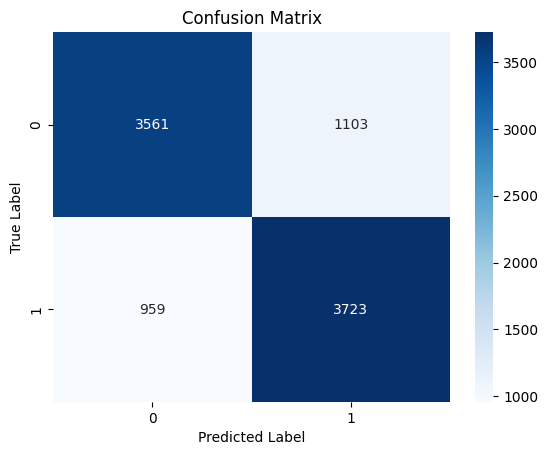

In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test from the previous step

# 1. Create and Train Decision Tree Model
model = DecisionTreeClassifier(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# 2. Predict and Evaluate
y_pred = model.predict(X_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Repeat the above steps with all the supervised ML techniques that you are familiar with:

#### 9b. Decision Tree                        **[10 points]**
#### 9c. Random Forest                        **[10 points]**
#### 9d. K-Nearest Neighbors                  **[10 points]**
#### 9e. Support Vector Machine (NEW method)  **[10 points]**

Accuracy: 0.7794
Confusion Matrix:
[[3561 1103]
 [ 959 3723]]


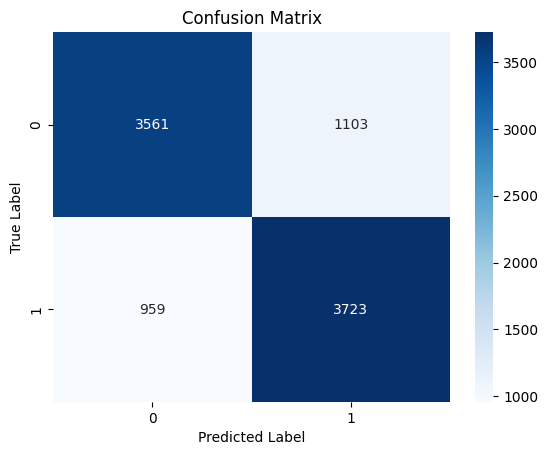

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      4664
           1       0.77      0.80      0.78      4682

    accuracy                           0.78      9346
   macro avg       0.78      0.78      0.78      9346
weighted avg       0.78      0.78      0.78      9346



In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test from the previous step

# 1. Create and Train Decision Tree Model
model = DecisionTreeClassifier(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# 2. Predict and Evaluate
y_pred = model.predict(X_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Feature Importance (Optional)
# If you want to see feature importance:
# importances = model.feature_importances_
# # ... (code to visualize feature importances) ...

Accuracy: 0.8578
Confusion Matrix:
[[4156  508]
 [ 821 3861]]


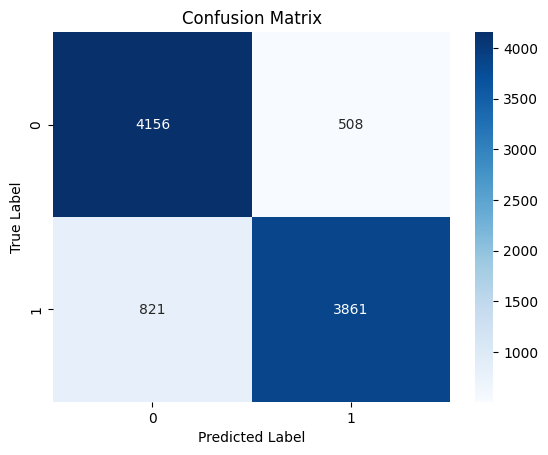

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4664
           1       0.88      0.82      0.85      4682

    accuracy                           0.86      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.86      0.86      0.86      9346



In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test from the previous step

# 1. Create and Train Random Forest Model
model = RandomForestClassifier(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# 2. Predict and Evaluate
y_pred = model.predict(X_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Feature Importance (Optional)
# If you want to see feature importance:
# importances = model.feature_importances_
# # ... (code to visualize feature importances) ...

Accuracy: 0.8041
Confusion Matrix:
[[3774  890]
 [ 941 3741]]


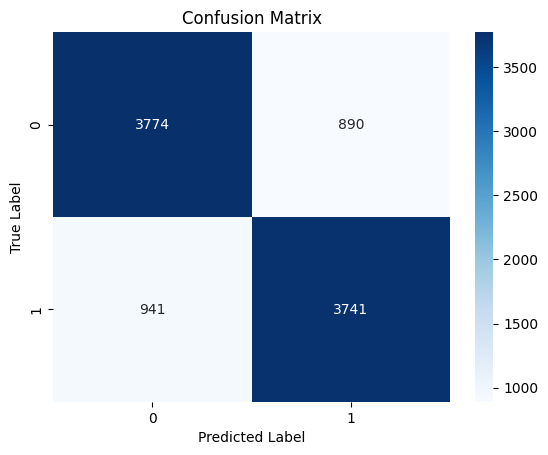

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4664
           1       0.81      0.80      0.80      4682

    accuracy                           0.80      9346
   macro avg       0.80      0.80      0.80      9346
weighted avg       0.80      0.80      0.80      9346



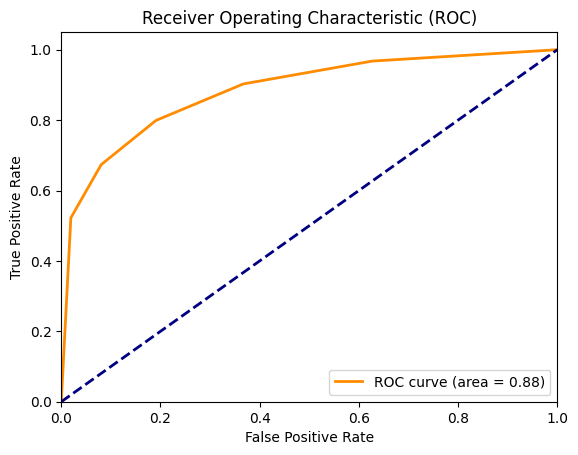

In [54]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer # import SimpleImputer

# Assuming you have X_train, X_test, y_train, y_test from the previous step

# 1. Create and Train KNN Model
model = KNeighborsClassifier(n_neighbors=5)  # Initialize with k=5 (you can adjust)

# Impute missing values using SimpleImputer before training
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test = imputer.transform(X_test)  # Transform test data using the fitted imputer

model.fit(X_train, y_train)  # Train the model

# 2. Predict and Evaluate
y_pred = model.predict(X_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 5. ROC-AUC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 6. Feature Importance (KNN doesn't have built-in feature importance)
# You can use techniques like permutation importance for feature importance with KNN

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined

# 1. Create and Train SVM Model
model = SVC(kernel='linear', random_state=42)  # Initialize with a linear kernel
model.fit(X_train, y_train)  # Train the model on your data

# 2. Predict and Evaluate
y_pred = model.predict(X_test)  # Predict using your test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))